#Setting Up and Preprocessing
In this example we'll be focusing on preprocessing, so we'll work with a small dataset. We'll pretend we are CLASSFIYING whether a good was purchased based off of a person's country, age, and salary, etc.

##Imports

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Note: using "as" allows us to specify a name to call a library without having to use the fully qualified name
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce

##Loading Data

In [ ]:
###To view sklearn built in datasets: https://scikit-learn.org/stable/datasets/toy_dataset.html
dataset = pd.read_csv("Data_Preprocess.csv")

In [ ]:
#print(dataset)
dataset

,Country,Age,Salary,Purchased,Arrival Time
0,France,44.0,72000.0,No,Morning
1,Spain,27.0,48000.0,Yes,Morning
2,NaN,30.0,54000.0,No,Afternoon
3,Spain,38.0,61000.0,No,Evening
4,Germany,40.0,NaN,Yes,Morning
5,France,35.0,58000.0,Yes,Evening
6,Spain,NaN,52000.0,No,Morning
7,France,48.0,79000.0,Yes,Evening
8,Germany,50.0,83000.0,No,Evening
9,France,37.0,67000.0,Yes,Afternoon


In [ ]:
print(dataset.size)
print(dataset.columns)
cols = dataset.columns

50
Index(['Country', 'Age', 'Salary', 'Purchased', 'Arrival Time'], dtype='object')


##Removing Unsalvagable Rows

In [ ]:
#Note you have to set dataset EQUAL to the operation you are performing
dataset = dataset.dropna(subset=['Country'])
print(dataset)

   Country   Age   Salary Purchased Arrival Time
0   France  44.0  72000.0        No      Morning
1    Spain  27.0  48000.0       Yes      Morning
3    Spain  38.0  61000.0        No      Evening
4  Germany  40.0      NaN       Yes      Morning
5   France  35.0  58000.0       Yes      Evening
6    Spain   NaN  52000.0        No      Morning
7   France  48.0  79000.0       Yes      Evening
8  Germany  50.0  83000.0        No      Evening
9   France  37.0  67000.0       Yes    Afternoon


##Imputing Null Values

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

#Import
from sklearn.impute import SimpleImputer

#Define instance with your parameters
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

#Convert dataset
dataset = np.array(dataset)

#Employ instance of imputer
dataset[:, 1:3] = imp_mean.fit_transform((dataset)[:, 1:3])

In [ ]:
dataset

array([['France', 44.0, 72000.0, 'No', 'Morning'],
       ['Spain', 27.0, 48000.0, 'Yes', 'Morning'],
       ['Spain', 38.0, 61000.0, 'No', 'Evening'],
       ['Germany', 40.0, 65000.0, 'Yes', 'Morning'],
       ['France', 35.0, 58000.0, 'Yes', 'Evening'],
       ['Spain', 39.875, 52000.0, 'No', 'Morning'],
       ['France', 48.0, 79000.0, 'Yes', 'Evening'],
       ['Germany', 50.0, 83000.0, 'No', 'Evening'],
       ['France', 37.0, 67000.0, 'Yes', 'Afternoon']], dtype=object)

##Converting Ordinal Categorical Columns

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

#Import
from sklearn.preprocessing import OrdinalEncoder

#Define instance with your parameters
ord = OrdinalEncoder(categories=[['Morning', 'Afternoon', 'Evening']])

#Convert dataset
#dataset = np.array(dataset)

#Employ instance of imputer
dataset[:, 4:5] = ord.fit_transform((dataset)[:, 4:5])

In [ ]:
dataset

array([['France', 44.0, 72000.0, 'No', 2.0],
       ['Spain', 27.0, 48000.0, 'Yes', 2.0],
       ['Spain', 38.0, 61000.0, 'No', 1.0],
       ['Germany', 40.0, 65000.0, 'Yes', 2.0],
       ['France', 35.0, 58000.0, 'Yes', 1.0],
       ['Spain', 39.875, 52000.0, 'No', 2.0],
       ['France', 48.0, 79000.0, 'Yes', 1.0],
       ['Germany', 50.0, 83000.0, 'No', 1.0],
       ['France', 37.0, 67000.0, 'Yes', 0.0]], dtype=object)

##Converting Nominal Categorical Columns

In [ ]:
#Convert back
dataset = pd.DataFrame(dataset)
dataset.columns = cols

ct = ce.one_hot.OneHotEncoder(cols=['Country'], drop_invariant=True, return_df=True)

dataset = ct.fit_transform(dataset)

In [ ]:
dataset

,Country_1,Country_2,Country_3,Age,Salary,Purchased,Arrival Time
0,1,0,0,44.0,72000.0,No,2.0
1,0,1,0,27.0,48000.0,Yes,2.0
2,0,1,0,38.0,61000.0,No,1.0
3,0,0,1,40.0,65000.0,Yes,2.0
4,1,0,0,35.0,58000.0,Yes,1.0
5,0,1,0,39.875,52000.0,No,2.0
6,1,0,0,48.0,79000.0,Yes,1.0
7,0,0,1,50.0,83000.0,No,1.0
8,1,0,0,37.0,67000.0,Yes,0.0


##Splitting Labels from Dataset

In [ ]:
y = dataset.Purchased
x = dataset.drop(columns=['Purchased'])

In [ ]:
y


0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6    Yes
7     No
8    Yes
Name: Purchased, dtype: object

In [ ]:
x

,Country_1,Country_2,Country_3,Age,Salary,Arrival Time
0,1,0,0,44.0,72000.0,2.0
1,0,1,0,27.0,48000.0,2.0
2,0,1,0,38.0,61000.0,1.0
3,0,0,1,40.0,65000.0,2.0
4,1,0,0,35.0,58000.0,1.0
5,0,1,0,39.875,52000.0,2.0
6,1,0,0,48.0,79000.0,1.0
7,0,0,1,50.0,83000.0,1.0
8,1,0,0,37.0,67000.0,0.0


##Testing and Training Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

##Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Visualizing

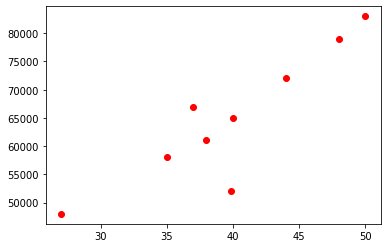

In [ ]:
plt.scatter(x.Age, x.Salary, color = 'red')
plt.show()